In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob

['../1D-signals/ramp_sinus_samples.npy', '../1D-signals/sin_sinc_samples.npy', '../1D-signals/step_samples.npy', '../1D-signals/exp_sinc_samples.npy', '../1D-signals/sin_samples.npy', '../1D-signals/sinc_samples.npy', '../1D-signals/step_sinc_samples.npy', '../1D-signals/exponencial_samples.npy', '../1D-signals/exp_sinus_samples.npy']


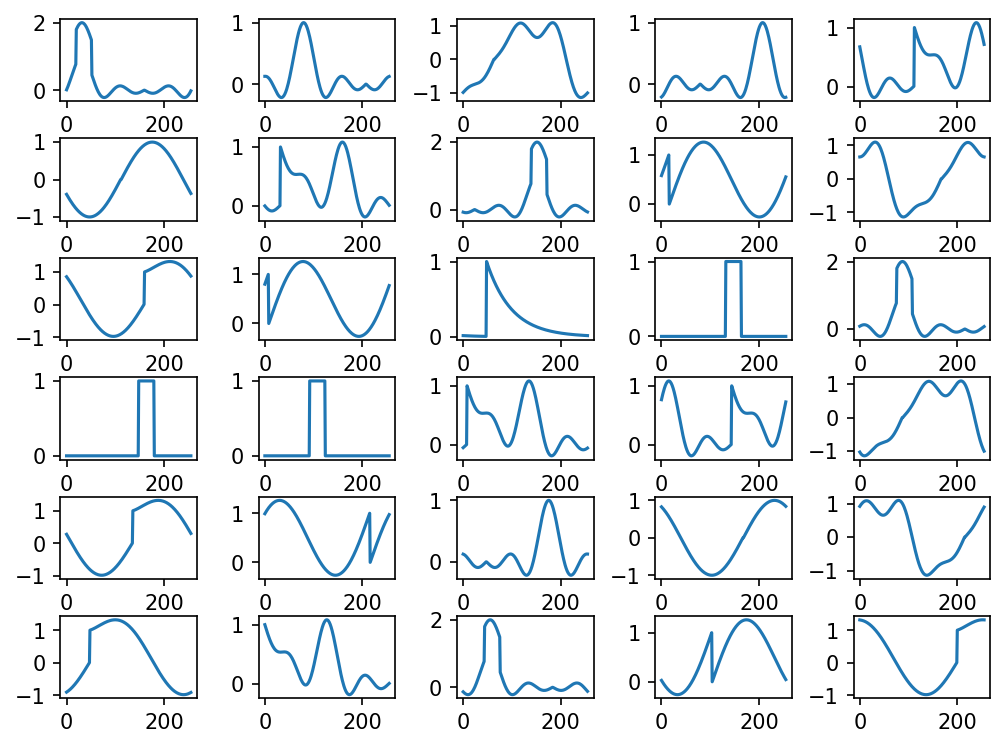

In [2]:
# Dataset of common 1D signals
signals_list = glob.glob("../1D-signals/*.npy")
counter = 30 #for each signal there are 30 samples
print(signals_list)


# Loading data
data = np.zeros((counter*len(signals_list),256))
for (i,signal) in enumerate(signals_list):
    data[counter*i:counter*(i+1),:] = np.load(signal)
np.random.shuffle(data)


# Displaying some samples in the dataset
plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(6, 5)
gs1.update(wspace=0.45, hspace=0.45)

for ii in range(30):
    plt.subplot(gs1[ii])
    plt.plot(data[ii].T)
plt.show()

(270, 1)


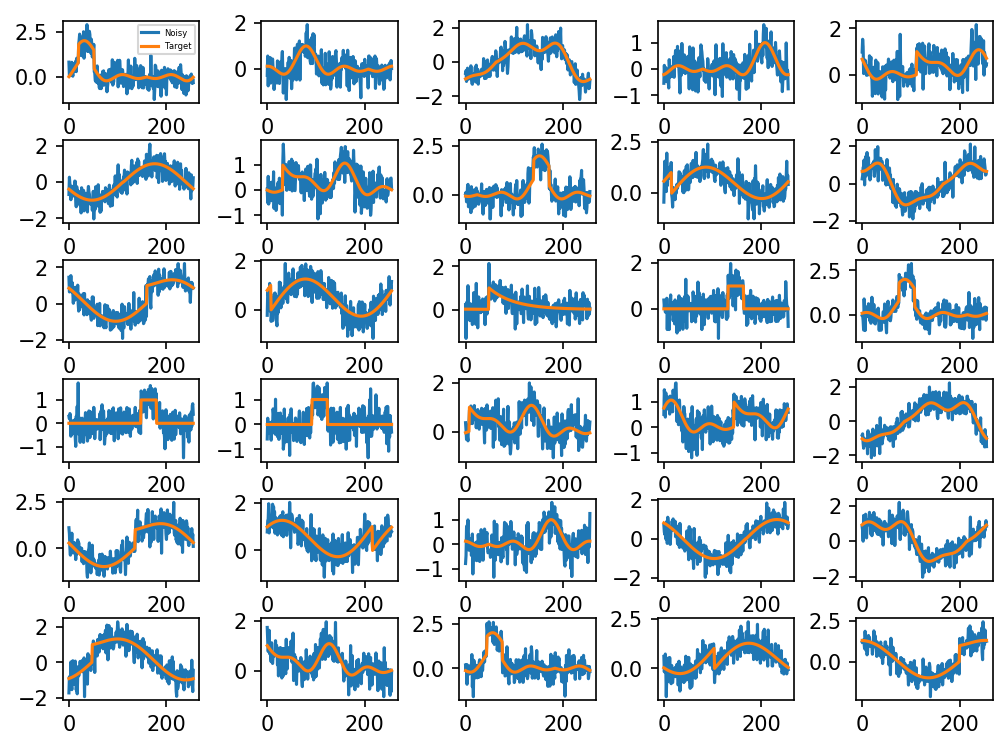

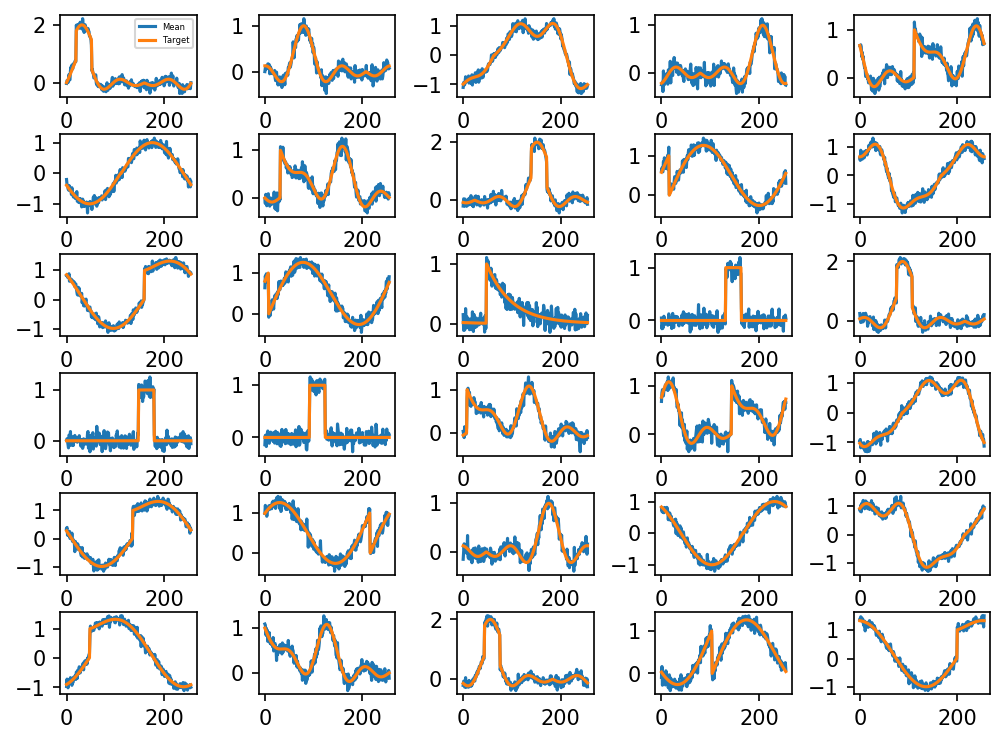

In [3]:
# Adding noise using target SNR
x_watts = data ** 2 # Power of the data

target_snr_db = 4

# Calculate average signal power and convert to dB 
sig_avg_watts = np.mean(x_watts,axis =1,keepdims = True)
sig_avg_db = 10 * np.log10(sig_avg_watts)

# Calculate noise and then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
print(noise_avg_watts.shape)

mean_noise = 0

# Noise up the original signal (again) and plot
data_noise = np.zeros((counter*len(signals_list),256,20))

for i in range(data.shape[0]):
    for j in range(20):
        # Generate an sample of white noise
        noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts[0,0]), x_watts.shape[1])
        # Noise up the original signal
        data_noise[i,:,j] = data[i] + noise_volts

    
# Displaying some samples in the dataset
plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(6, 5)
gs1.update(wspace=0.45, hspace=0.45)

for ii in range(30):
    plt.subplot(gs1[ii])
    plt.plot(data_noise[ii,:,0],label = "Noisy")
    plt.plot(data[ii,:],label = "Target")
    if (ii == 0):
        plt.legend(fontsize = 4)
plt.show()

# Displaying some samples in the validation
plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(6, 5)
gs1.update(wspace=0.45, hspace=0.45)

for ii in range(30):
    plt.subplot(gs1[ii])
    plt.plot(data_noise[ii].mean(axis = -1).T,label = 'Mean')
    plt.plot(data[ii].T, label = "Target")
    if (ii == 0):
        plt.legend(fontsize = 4)
plt.show()

In [4]:
np.save("noisy_transients.npy",data_noise)
np.save("reference.npy",data)